### __Name: Ishita Mehta__

### Task 3:
- Perform Exploratory Data Analysis on 'Global Terrorism'.
- As a security/defense analyst, try to find the hot zone of terrorism.
- What all security issues and insights can you derive by EDA? <br> <br>
- Dataset: https://bit.ly/2TK5Xn5

### Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'white'})

### Load the Dataset

In [3]:
df= pd.read_csv('globalterrorismdb_0718dist.csv',engine='python')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

### Data Preprocessing

In [5]:
## Columns having null values.
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
## Renaming the columns.
df.rename(columns={'iyear':'year', 'imonth':'month','country_txt':'Country', 'region_txt':'Region','provstate':'State', 'attacktype1_txt':'Attack Type','targtype1_txt':'Target Type', 'targsubtype1_txt':'Target SubType','target1':'Target','gname':'Group Name','weaptype1_txt':'Weapon Type','weapsubtype1_txt':'Weapon Subtype','nkill':'Killed','nwound':'Wounded','propcomment':'Property Damage'},inplace= True)

In [7]:
df= df[['year','month','Country','Region','State','city','location','success','Attack Type','Target Type','Target SubType','Target','Group Name','motive','Weapon Type','Weapon Subtype','Killed','Wounded','Property Damage']]
df.head()

,year,month,Country,Region,State,city,location,success,Attack Type,Target Type,Target SubType,Target,Group Name,motive,Weapon Type,Weapon Subtype,Killed,Wounded,Property Damage
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,1,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,NaN,1.0,0.0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,NaN,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,NaN,0.0,0.0,NaN
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,NaN,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,NaN,1.0,0.0,NaN
3,1970,1,Greece,Western Europe,Attica,Athens,NaN,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,Unknown Explosive Type,NaN,NaN,NaN
4,1970,1,Japan,East Asia,Fukouka,Fukouka,NaN,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN,NaN,NaN


In [8]:
df.shape

(181691, 19)

Text(0.5, 1.0, 'Top 50 terrorism-prone countries')

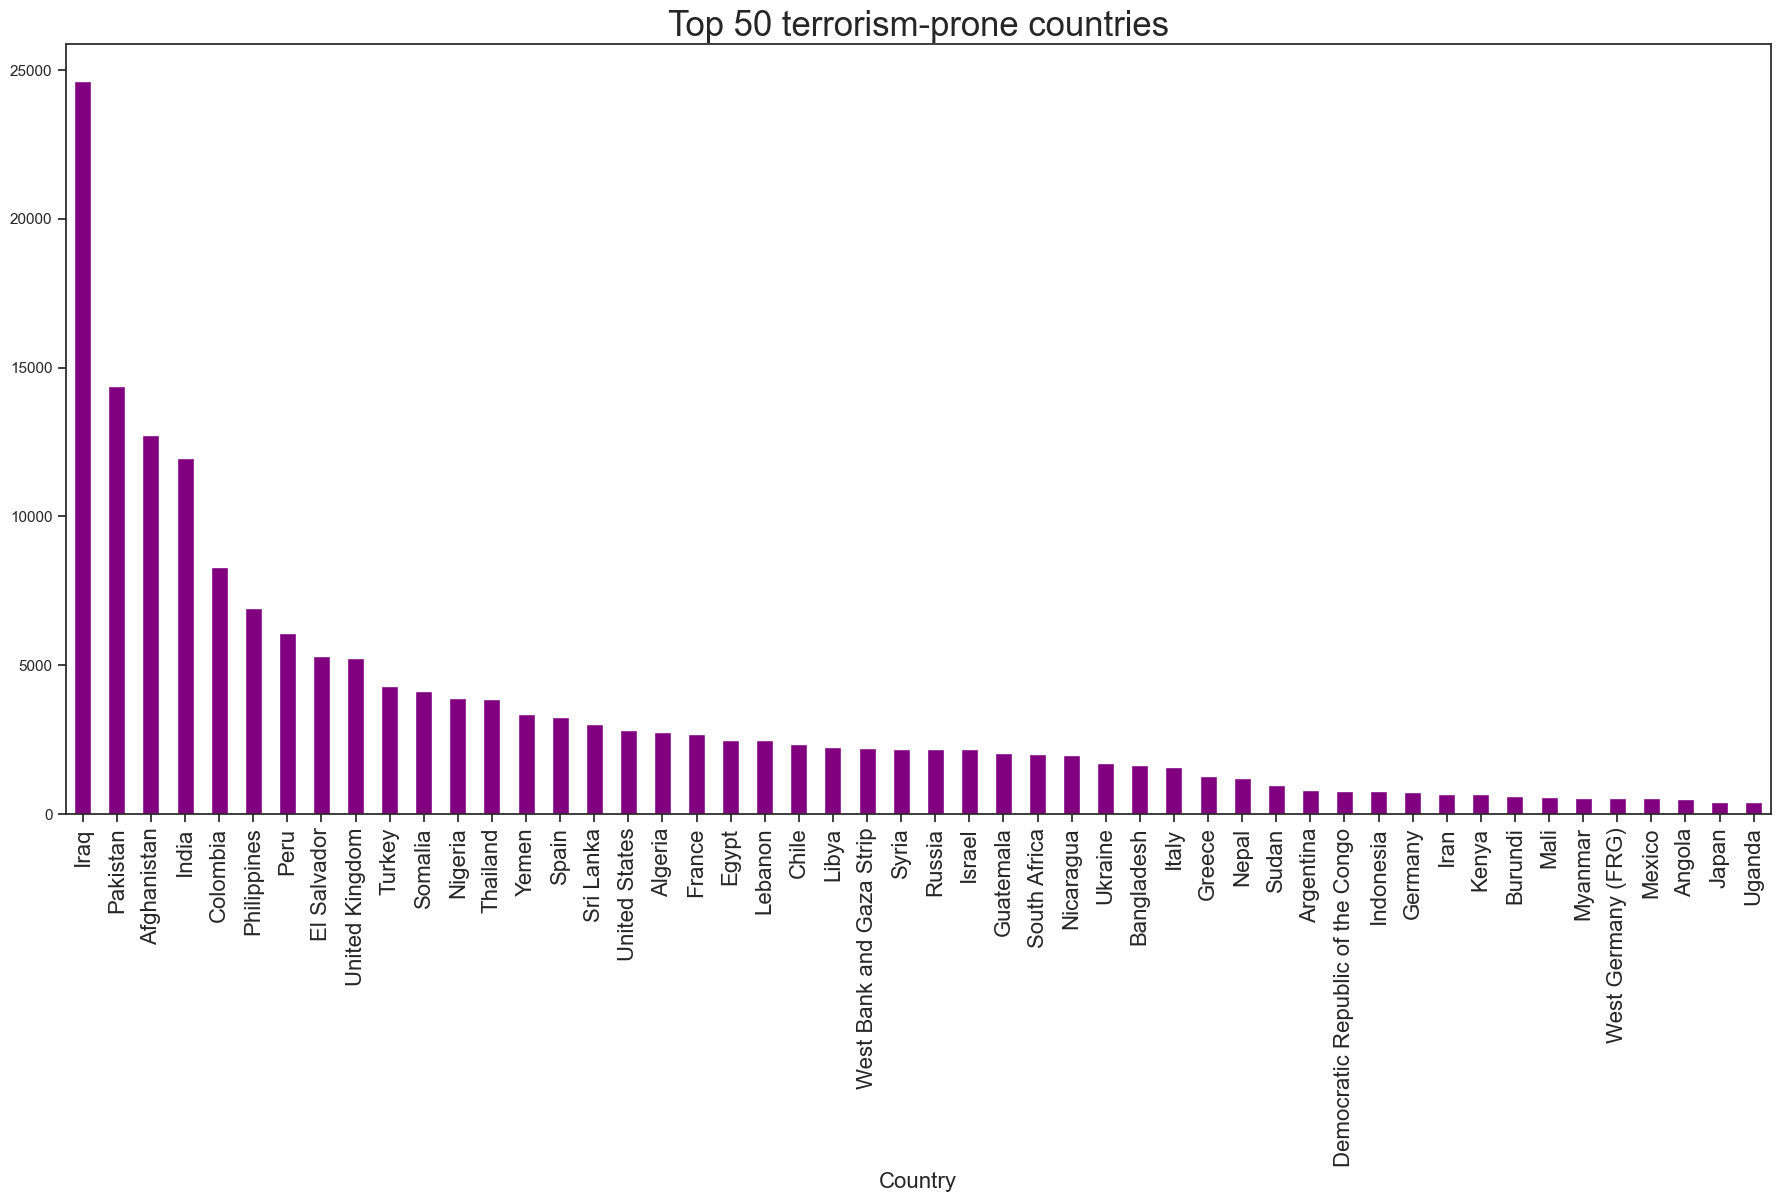

In [23]:
ctry= df['Country'].value_counts()[:50]
ctry.plot.bar(figsize=(22,10), color='purple')
plt.xlabel('Country',fontsize=16)
plt.xticks(fontsize=16)
plt.title('Top 50 terrorism-prone countries', fontsize=25)

Text(0.5, 1.0, 'Terrorism-prone Regions')

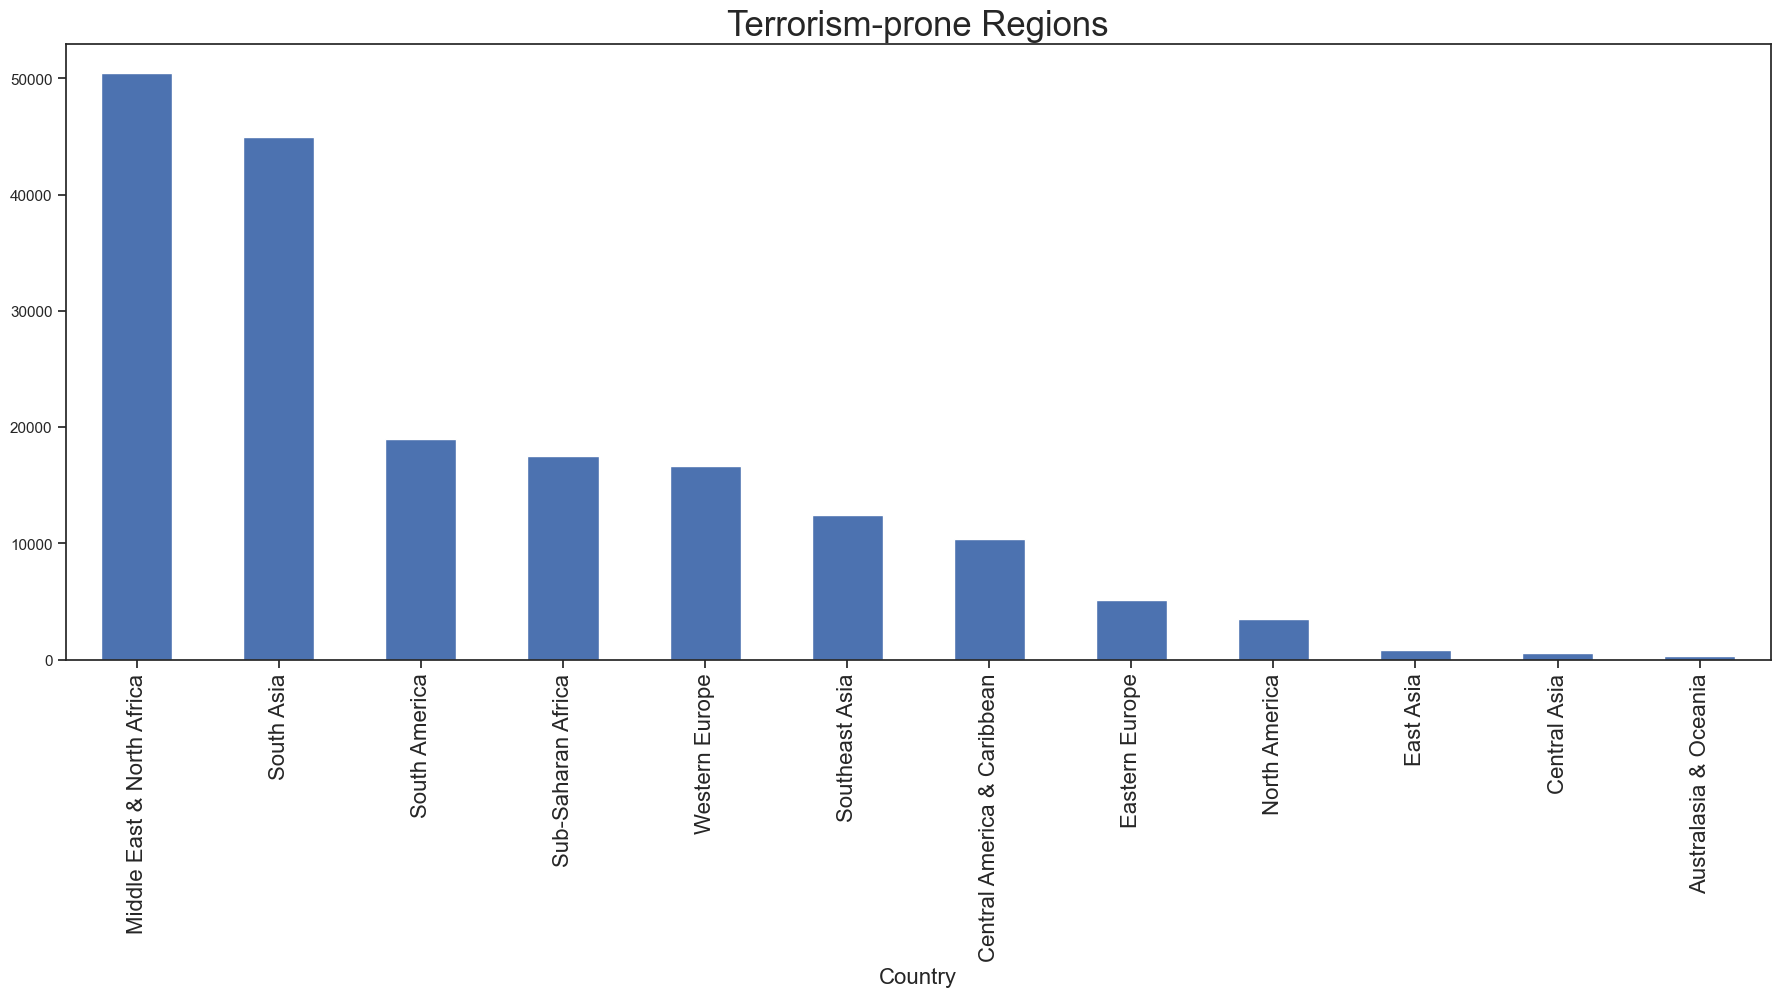

In [24]:
region= df['Region'].value_counts()
region.plot.bar(figsize=(22,8))
plt.xlabel('Country',fontsize=16)
plt.xticks(fontsize=16)
plt.title('Terrorism-prone Regions', fontsize=25)

Text(0.5, 0, 'Target-type')

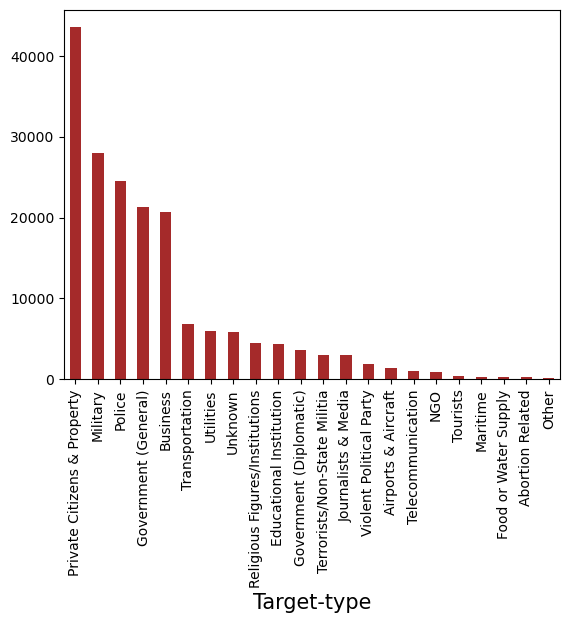

In [11]:
at= df['Target Type'].value_counts()
at.plot.bar(color='brown')
plt.xlabel('Target-type',fontsize=15)

Text(0.5, 1.0, 'Region-wise terrorism over the years')

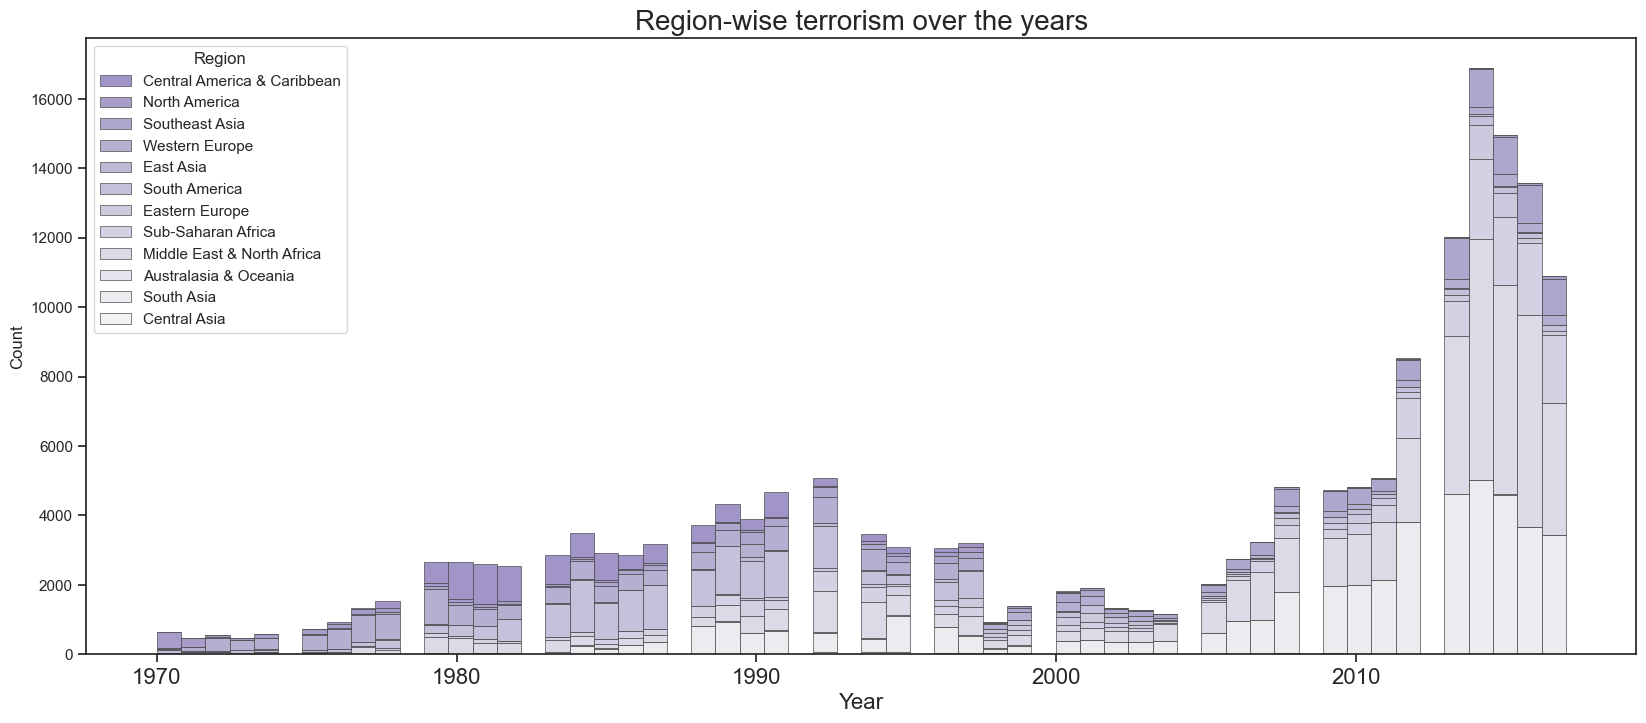

In [26]:
plt.figure(figsize=(20,8))
sns.set_theme(style="ticks")
sns.histplot(
    df,
    x="year", hue="Region",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale= False,
)
plt.xlabel('Year',fontsize=16)
plt.xticks(fontsize=16)
plt.title('Region-wise terrorism over the years', fontsize=20)

Number of people Killed and Wounded grouped by the type of attack:

In [28]:
df.groupby('Attack Type')['Killed','Wounded'].count()

<ipython-input-28-1412b1144ece>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Attack Type')['Killed','Wounded'].count()


,Killed,Wounded
Attack Type,,
Armed Assault,40353,38392
Assassination,19233,17986
Bombing/Explosion,84322,82678
Facility/Infrastructure Attack,9788,9656
Hijacking,606,592
Hostage Taking (Barricade Incident),898,844
Hostage Taking (Kidnapping),8610,8138
Unarmed Assault,1001,922
Unknown,6567,6172


<ipython-input-13-5c5219e58623>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  attack=df.groupby('Attack Type')['Killed','Wounded'].count()


<AxesSubplot:xlabel='Attack Type'>

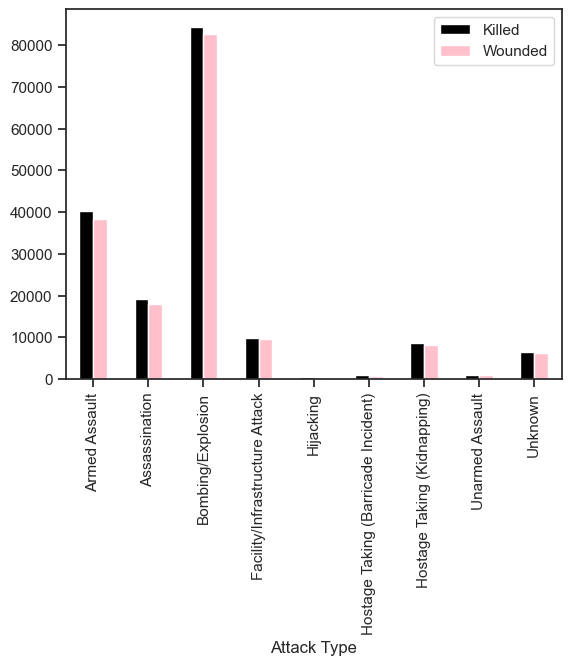

In [13]:
attack=df.groupby('Attack Type')['Killed','Wounded'].count()
attack.plot.bar(color=['black','pink'])

Text(0.5, 1.0, 'Top 20 Terrorist Groups')

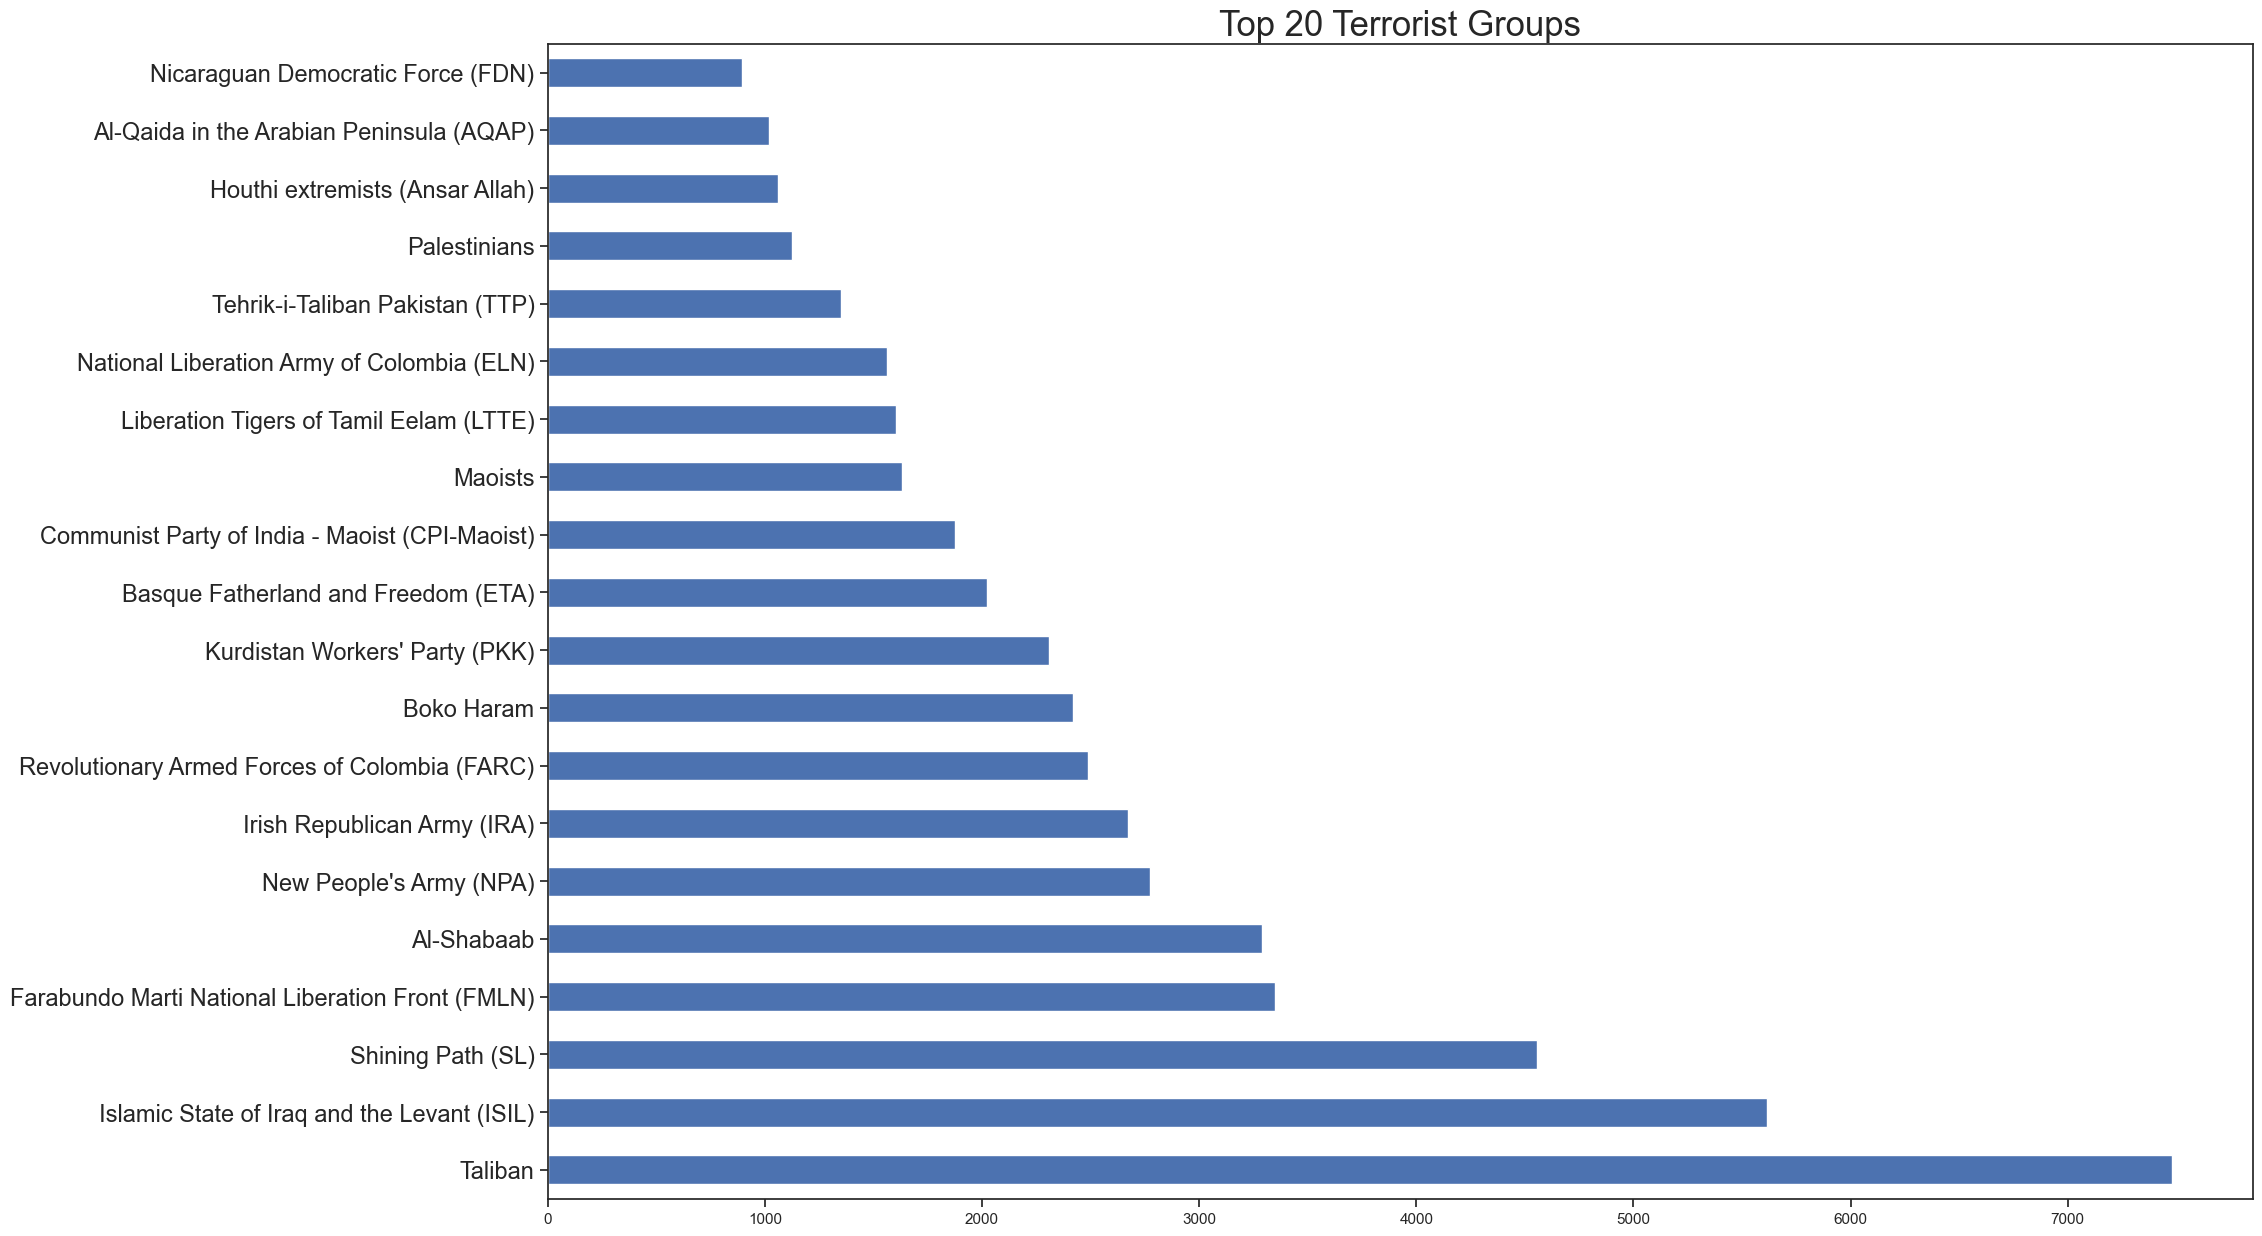

In [27]:
at= df['Group Name'].value_counts().drop('Unknown')[:20]
at.plot.barh(figsize=(22,15))
plt.yticks(fontsize=17)
plt.title('Top 20 Terrorist Groups', fontsize=25)

### Conclusion:

In [15]:
print('Number of successful attacks: ',df['success'].sum())

Number of successful attacks:  161632


- Regions of Middle East and North Africa are most prone to terrorism, while Iraq is the most prone country.
- The most targeted areas were Private citizens and property.
- There has been a continuous increase in terrorism from 1970, the maximum being in the year 2014.
- Bombing and Explosion caused the most number of wounded people and killings.
- Taliban, ISIL,SL are the most active terrorist groups.